# Geometry loading from file

This example shows how to initialize a fast directional radiosity instance from CAD files.
We also go over how properties of the models translate to properties of the radiosity simulation. 

**Note:** This feature is unsupported for the ``RadiosityKang`` class.
If you haven't, we recommend that you check the basic fast_radiosity example, as we will skip over basic radiosity class functionality in this example.

We start with our usual helpful imports

In [ ]:
import numpy as np
import pyfar as pf
import sparrowpy as sp
import matplotlib.pyplot as plt
import os

%matplotlib inline
# %matplotlib ipympl

base_dir=os.getcwd()+"\\resources\\"

c:\Users\jotag\Documents\dev\sparapy\examples\resources\



### Basic geometry loading

Currently, sparrowpy supports geometry loading from .stl and blender (.blend) files. 

- [**STL**] The raw geometry in the file is loaded. This format is material-agnostic.
- [**Blender**] Supports material assignment. The model's geometrical information (mesh) must be stored in a blender object called "Geometry" (with a capitalized "G"). Otherwise, the geometry will not be correctly loaded by sparrowpy. 


In these examples, we look at a cubic shoebox room with 2x2x2 walls.

We begin by loading a simple model with no wall subdivisions.

<img src="resources/cube_simple.png" alt="simple cube" width="400" class="center"/>

Below, we initialize the fast radiosity class with the same simple cube geometry from a Blender file, ``cube_simple.blend``. 

In [4]:
# initialize simple cube from Blender file
radi_simple_cube = sp.DirectionalRadiosityFast.from_file(
    base_dir+"cube_simple.blend")

print("Simple cube model:")
print(f'# walls: {radi_simple_cube.n_walls}')
print(f'# patches: {radi_simple_cube.n_patches}')
print(f'# sides per patch: {radi_simple_cube.patches_points.shape[1]}')

Simple cube model:
# walls: 6
# patches: 6
# sides per patch: 4


Since the model surfaces have no subdivisions, the number of walls is the same as the number of patches.

### Patch definition

By default, patches are defined automatically from the geometry model. Each polygon defined in the geometry is interpreted by sparrowpy as an individual patch.

Below, we check this for ``cube_square_patches.blend`` where each wall of the model is divided into 4 square walls.

<img src="resources/cube_square_patches.png" alt="simple cube" width="400" class="center"/>


In [5]:
# initialize cube with square patches
radi_square_patches = sp.DirectionalRadiosityFast.from_file(
    base_dir+"cube_square_patches.blend")


print("Square patches model:")
print(f'# walls: {radi_square_patches.n_walls}')
print(f'# patches: {radi_square_patches.n_patches}')
print(f'# sides per patch: {radi_square_patches.patches_points.shape[1]}')

Square patches model:
# walls: 6
# patches: 24
# sides per patch: 4


Alternatively, one may overwrite the automatic patch assignment.

This is done by defining the patch size with the argument ``manual_patch_size=<patch/size>`` (default ``None``)

The patches are defined from wall surfaces in the same way that the initialization ``sp.DirectionalRadiosityFast.from_polygon()`` generates patches for a list of ``Polygon`` objects. 

In [6]:
# overwrite simple cube model to 1x1 patches (4 per wall)
radi_ow_patches = sp.DirectionalRadiosityFast.from_file(
    base_dir+"cube_simple.blend", manual_patch_size=1.)

print("Overwritten 1x1 patches model:")
print(f'# walls: {radi_ow_patches.n_walls}')
print(f'# patches: {radi_ow_patches.n_patches}')
print(f'# sides per patch: {radi_ow_patches.patches_points.shape[1]}')

Overwritten 1x1 patches model:
# walls: 6
# patches: 24
# sides per patch: 4


**Note:** this method is only able to generate _square_ patches over the _whole geometry_ with a side dimension of ``patch_size``. This method also depends on the assumption that the wall dimensions of the whole model are perfectly divisible by the patch size dimension.

Sparrowpy supports geometries with triangular patches.

<img src="resources/cube_triangle_patches.png" alt="simple cube" width="400" class="center"/> 

It also supports patches of irregular areas and aspect ratios.

<img src="resources/cube_uneven_patches.png" alt="simple cube" width="400" class="center"/>

In [7]:
# import model with triangular patches
radi_triangle_patches = sp.DirectionalRadiosityFast.from_file(
    base_dir+"cube_triangle_patches.blend")

# import model with uneven rectangular patches
radi_uneven_patches = sp.DirectionalRadiosityFast.from_file(
    base_dir+"cube_uneven_patches.blend")

print("Triangle patches model (two per wall):")
print(f'# walls: {radi_triangle_patches.n_walls}')
print(f'# patches: {radi_triangle_patches.n_patches}')
print(f'# sides per patch: {radi_triangle_patches.patches_points.shape[1]}')

print("\n\nUneven rectangle patches model:")
print(f'# walls: {radi_uneven_patches.n_walls}')
print(f'# patches: {radi_uneven_patches.n_patches}')
print(f'# sides per patch: {radi_uneven_patches.patches_points.shape[1]}')

Triangle patches model (two per wall):
# walls: 6
# patches: 12
# sides per patch: 3


Uneven rectangle patches model:
# walls: 6
# patches: 10
# sides per patch: 4


Sparrowpy only supports models where all patches have the same number of sides.

We recommend either quadrangular or triangular polygons for patch definition, as other n-gon patches are untested (though theoretically supported).

### Wall definition
Sparrowpy groups patches by "walls", mapping patches to surfaces with common normal vectors and material properties. This is a means to save on memory consumption by the simulation.

Note that walls should be rectangular quadrangles.

By default, ``DirectionalRadiosityFast.from_file()`` maps patches to walls automatically. Patches are mapped to the same wall if they are:
- contiguous
- coplanar
- same in material properties

Wall mapping can be overwritten by setting the argument ``auto_walls=False``. This assigns a wall for each polygon defined in the model.

Let's look at a model where one of the walls has some patches with a different material from the rest of the model.


<img src="resources/cube_different_materials.png" alt="simple cube" width="400" class="center"/>

In [8]:
# automatic wall assignment
radi_auto_walls = sp.DirectionalRadiosityFast.from_file(
    base_dir+"cube_diff_materials.blend", auto_walls=True)

print("Auto walls geometry:")
print(f'# walls: {radi_auto_walls.n_walls}')
print(f'# patches: {radi_auto_walls.n_patches}')



# non-automatic wall assignment
radi_nauto_walls = sp.DirectionalRadiosityFast.from_file(
    base_dir+"cube_diff_materials.blend", auto_walls=False)

print("\n\nNon-auto walls geometry:")
print(f'# walls: {radi_nauto_walls.n_walls}')
print(f'# patches: {radi_nauto_walls.n_patches}')


Auto walls geometry:
# walls: 7
# patches: 10


Non-auto walls geometry:
# walls: 10
# patches: 10


STL files, as mentioned, do not include material properties

Below is a table summarizing the behavior of the auto_walls and manual_patch_size options for an example group of surfaces, shown here
 
<img src="resources/geom_input.png" width="300" class="center"/> 

| | | | | |
|:---:|:---:|:---:|:---:|:---:|
|  **manual_patch_size**  | **None** | **None** | **h/2**                                      |  **h/2**  |
|   **auto_walls**   | **True** | **False** | **True** |  **False**  |
|       Patches      | <img src="resources/auto_patches.png" width="150" class="center"/> | <img src="resources/auto_patches.png" width="150" class="center"/> | <img src="resources/hand_patches.png" width="150" class="center"/> | <img src="resources/hand_patches.png" width="150" class="center"/> |
| Patch requirements | must have same number of sides | must have same number of sides | --- | --- |
|        Walls       | <img src="resources/auto_walls.png" width="150" class="center"/> | <img src="resources/autop_handwalls.png" width="150" class="center"/> | <img src="resources/auto_walls.png" width="150" class="center"/> | <img src="resources/handp_handwalls.png" width="150" class="center"/> |
|  Wall requirements | must have same number of sides | --- | must be rectangular | must be rectangular |
|      use case      | recommended. memory-efficient; geometry definitions done in external GUI  | e.g. in case patch properties should be changed manually throughout the simulation | e.g. to easily change patch dimensions without the need to develop a separate model | e.g. to hard code changes to patch dimensions and surface properties throughout the simulation |


## Correctness

Now, we can check if the results of the simulations of the models we loaded before are comparable.

In [9]:
# list our initialized radiosity models
radi_list = [radi_simple_cube, radi_square_patches, radi_ow_patches,
        radi_triangle_patches, radi_uneven_patches]

radi_names = ["simple cube", "auto square patches",
              "non-auto square patches", "triangular patches",
              "uneven rectangular patches"]

# acoustic scene parameters
etc_duration = .2
etc_time_resolution = 1/1000
max_reflection_order = 50
speed_of_sound = 343.2
absorption = 0.3

etc_collection = []

# introduce source and receiver
source = pf.Coordinates(0, 0, 0)
receiver = pf.Coordinates(.5, .5, .5)

# create directional scattering data (perfectly diffuse)
brdf_sources = pf.Coordinates(0, 0, 1, weights=1)
brdf_receivers = pf.Coordinates(0, 0, 1, weights=1)
frequencies = np.array([1000])
brdf = sp.brdf.create_from_scattering(
    brdf_sources,
    brdf_receivers,
    pf.FrequencyData(1, frequencies),
    pf.FrequencyData(absorption, frequencies))

Now we can run the simulation for each of the cube room models

In [10]:
# iterate over all radiosity instances
for i,radi in enumerate(radi_list):
    print(f"simulating {radi_names[i]} model ...",end="")

    # set propagation parameters
    radi.set_wall_brdf(np.arange(radi.n_walls),
                       brdf, brdf_sources, brdf_receivers)
    radi.set_air_attenuation(
                    pf.FrequencyData(
                        np.zeros_like(brdf.frequencies),
                        brdf.frequencies))
    # bake geometry
    radi.bake_geometry()
    # initialize energy propagation
    radi.init_source_energy(source)
    # propagate energy
    radi.calculate_energy_exchange(
                speed_of_sound=speed_of_sound,
                etc_time_resolution=etc_time_resolution,
                etc_duration=etc_duration,
                max_reflection_order=max_reflection_order)

    # store etcs
    etc_collection.append(
        radi.collect_energy_receiver_mono(receivers=receiver))
    print("done!")
    del radi

simulating simple cube model ...

C:\Users\jotag\AppData\Local\Temp\ipykernel_28444\1100979281.py:6: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(np.arange(radi.n_walls),
C:\Users\jotag\Documents\dev\sparapy\sparrowpy\form_factor\universal.py:48: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  form_factors[i,j] = universal_form_factor(


done!
simulating auto square patches model ...

C:\Users\jotag\AppData\Local\Temp\ipykernel_28444\1100979281.py:6: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(np.arange(radi.n_walls),


done!
simulating non-auto square patches model ...done!
simulating triangular patches model ...done!
simulating uneven rectangular patches model ...done!


Now we plot the energy decay

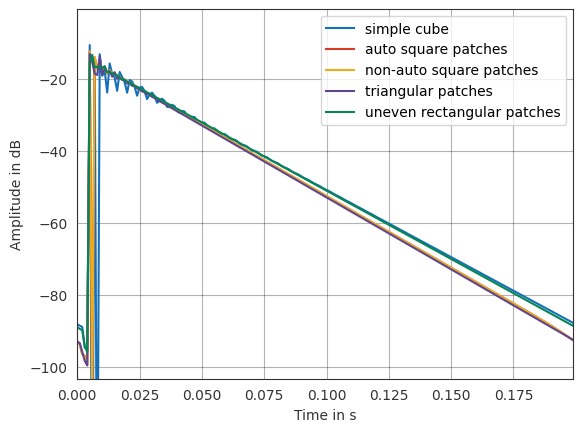

In [11]:
plt.figure()

for i in range(len(etc_collection)):
    pf.plot.time(
    etc_collection[i], dB=True, log_prefix=10,
    label=radi_names[i])

plt.legend()
plt.show()

## Final remarks
Be mindful when generating the models for sparrowpy to load.

Besides the requirements for patch and wall definition, remember to define the surface normals relative to the half-space where the sound reflections are expected to take place. Sparrowpy relies on a correct surface normal definition for many of its operations.
